In [133]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

In [134]:
is_py=False

In [135]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [136]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\JupyterCode\MyQuantFinProject\Data'
file_name='6MyCrypto.csv'



# since the end calculate since x 
to_month_str='2022-05'

# Whick time frame   and look past in the past x month
timeframe='M'
past_month=10

#timeframe='W'
#past_week=8

required_fullname=False

today=datetime.datetime.today()
print(today)




2022-05-22 23:29:58.799929


#Enter data

if is_py:
    print("Enter Timeframe (m or w)")
    timeframe = input("Enter TimeFrame : ")
    timeframe=timeframe.upper()

    print("Enter To Date asY-m (2022-03)")
    end_param = input("Enter end : ")



    try:
        start_dt=datetime.strptime(start, "%Y.%m.%d")
        end_dt=datetime.strptime(end,"%Y.%m.%d")
        if start_dt>=end_dt:
           raise Exception(f"Error : {start_dt} can't be greater or equal to {end_dt}")
    except Exception as ex:
        raise ex



    print(f"Do you want to retrive data from {start_dt} to {end_dt} ?")
    press_y=input(f"Press y=True and n=False : ") 
    if press_y.lower()=='y':
     ok=True
    else:
     exit()
else: 
    start='2017.01.01'
    end= today_now.strftime("%Y.%m.%d")
    
print(f"{start} - {end}")

In [137]:
split_end_to=to_month_str.split('-')
range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))

to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[0] )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-05-06 00:00:00
2022-05-31 00:00:00


In [138]:
to_month_firstDate

datetime.datetime(2022, 5, 6, 0, 0)

In [139]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
     

print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

look back in the  10+1(Including current month)  M : 2021-07 - 2022-05


In [140]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
dfAll.index.rename('datetime',inplace=True)

df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)
df=df[['symbol','name','close']]

if required_fullname==True: 
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 858 entries, 2021-12-31 to 2022-05-22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  858 non-null    object 
 1   name    0 non-null      float64
 2   close   858 non-null    float64
dtypes: float64(2), object(1)
memory usage: 26.8+ KB
None
           symbol  name   close
datetime                       
2021-12-31   AVAX   NaN  109.43
2022-01-01   AVAX   NaN  114.13
2022-01-02   AVAX   NaN  113.03
2022-01-03   AVAX   NaN  108.11
2022-01-04   AVAX   NaN  103.33
           symbol  name  close
datetime                      
2022-05-18    SOL   NaN  49.93
2022-05-19    SOL   NaN  52.20
2022-05-20    SOL   NaN  49.43
2022-05-21    SOL   NaN  50.31
2022-05-22    SOL   NaN  51.45


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_16732\750907275.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [141]:
df.head()

,symbol,name,close
datetime,,,
2021-12-31,AVAX,NaN,109.43
2022-01-01,AVAX,NaN,114.13
2022-01-02,AVAX,NaN,113.03
2022-01-03,AVAX,NaN,108.11
2022-01-04,AVAX,NaN,103.33


In [142]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  22-05-2022
['AVAX', 'BNB', 'BTC', 'ETH', 'MATIC', 'SOL']


In [143]:
x="ETH"
dfx_symbol=df.query('symbol==@x')


In [144]:
dfx_symbol.head()

,symbol,name,close
datetime,,,
2021-12-31,ETH,NaN,3676.23
2022-01-01,ETH,NaN,3765.54
2022-01-02,ETH,NaN,3828.27
2022-01-03,ETH,NaN,3765.89
2022-01-04,ETH,NaN,3785.11


In [145]:
dfx_symbol.tail()

,symbol,name,close
datetime,,,
2022-05-18,ETH,NaN,1915.11
2022-05-19,ETH,NaN,2019.55
2022-05-20,ETH,NaN,1959.08
2022-05-21,ETH,NaN,1975.07
2022-05-22,ETH,NaN,2028.57


In [146]:
dfx_month = dfx_symbol.resample(timeframe).last()
dfx_month

,symbol,name,close
datetime,,,
2021-12-31,ETH,NaN,3676.23
2022-01-31,ETH,NaN,2686.94
2022-02-28,ETH,NaN,2920.95
2022-03-31,ETH,NaN,3281.51
2022-04-30,ETH,NaN,2726.66
2022-05-31,ETH,NaN,2028.57


In [147]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


  symbol month-year  pct_change
1   AVAX    01-2022       -36.2
2   AVAX    02-2022        21.0
3   AVAX    03-2022        15.2
4   AVAX    04-2022       -41.5
5   AVAX    05-2022       -46.2
  symbol month-year  pct_change
1    BNB    01-2022       -26.8
2    BNB    02-2022         5.7
3    BNB    03-2022         8.4
4    BNB    04-2022       -12.1
5    BNB    05-2022       -14.7
  symbol month-year  pct_change
1    BTC    01-2022       -16.8
2    BTC    02-2022        12.2
3    BTC    03-2022         5.4
4    BTC    04-2022       -17.3
5    BTC    05-2022       -19.9
  symbol month-year  pct_change
1    ETH    01-2022       -26.9
2    ETH    02-2022         8.7
3    ETH    03-2022        12.3
4    ETH    04-2022       -16.9
5    ETH    05-2022       -25.6
  symbol month-year  pct_change
1  MATIC    01-2022       -34.9
2  MATIC    02-2022        -1.8
3  MATIC    03-2022         0.6
4  MATIC    04-2022       -36.4
5  MATIC    05-2022       -35.0
  symbol month-year  pct_change
1    SOL

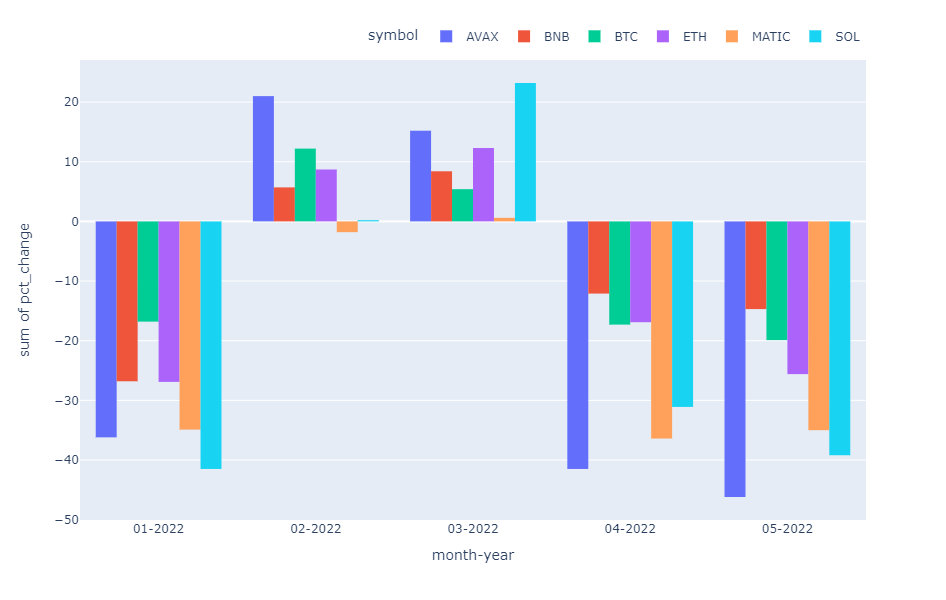

In [149]:
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

In [150]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,AVAX,01-2022,-36.2,0
1,AVAX,02-2022,21.0,1
2,AVAX,03-2022,15.2,1
3,AVAX,04-2022,-41.5,0
4,AVAX,05-2022,-46.2,0


In [151]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
1,02-2022,0,1
2,02-2022,1,5
3,03-2022,1,6
4,04-2022,0,6
5,05-2022,0,6


In [152]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])



if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,6
1,02-2022,0,1
2,02-2022,1,5
3,03-2022,1,6
4,04-2022,0,6
5,05-2022,0,6


In [153]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,6
1,02-2022,0,1
2,02-2022,1,5
3,03-2022,1,6
4,04-2022,0,6
5,05-2022,0,6


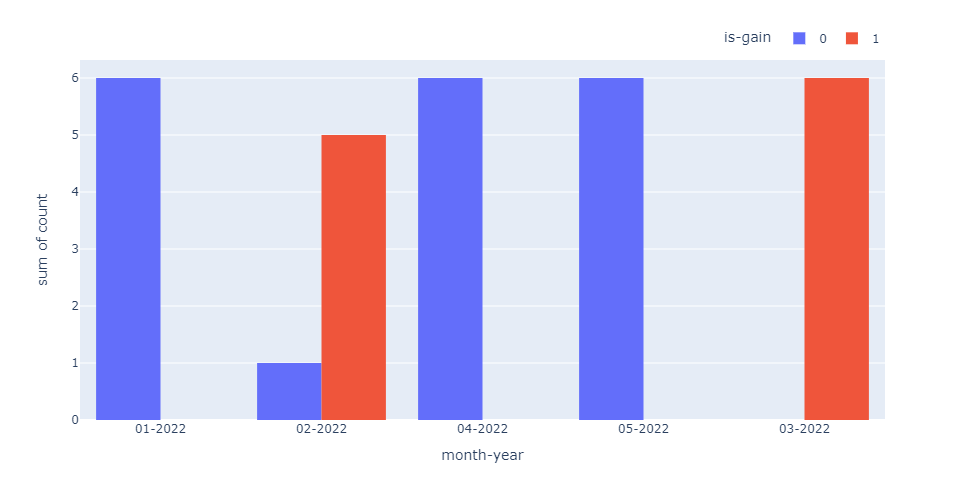

In [154]:


fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()